<a href="https://colab.research.google.com/github/barbosa-renan/estudos-ia/blob/main/fiap_clip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/openai/CLIP.git
!pip install matplotlib
!pip install torch torchvision


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-v35949x8
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-v35949x8
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.2 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=8734b1f66448f278b7f2ee94a4998c29ffc1e6108ff45adea3051b91b7d2622d
  Stored in directory: /tmp/pip-ephem-wheel-cache-dfmtsbtu/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [2]:
import clip
import torch
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 68.4MiB/s]


In [29]:
img_url = "https://www.adoropets.com.br/wp-content/uploads/2018/06/caracteristicas-dalmata.jpg"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

image_input = preprocess(img).unsqueeze(0).to(device)

text_input = clip.tokenize(["um dálmata deitado na grama"]).to(device)

model.eval()

with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_input)

image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# Calcular a similaridade entre a imagem e o texto
similarity = (image_features @ text_features.T).squeeze(0)
print(f"Similaridade entre imagem e texto: {similarity.item()}")


Similaridade entre imagem e texto: 0.21164052188396454


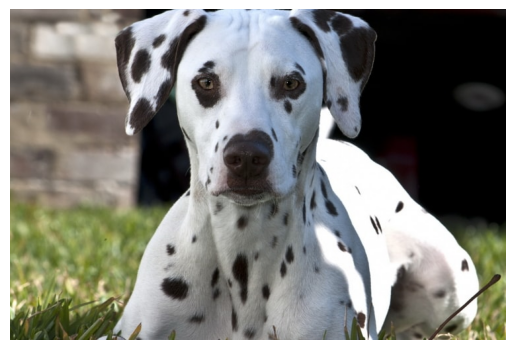

Similaridade entre a imagem e o texto: 0.2630173861980438


In [28]:
plt.imshow(np.array(img))
plt.axis("off")
plt.show()

print(f"Similaridade entre a imagem e o texto: {similarity.item()}")
